# Passo 1: Importando os módulos necessários

In [1]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

# Passo 2: Pegar dados no Yahoo Finance

In [2]:
ativos = ['^DJI','^BVSP']
hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days=365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High   
               ^BVSP          ^DJI     ^BVSP          ^DJI     ^BVSP   
Date                                                                   
2022-04-06  118228.0  34496.511719  118228.0  34496.511719  118885.0  \
2022-04-07  118862.0  34583.570312  118862.0  34583.570312  119247.0   
2022-04-08  118322.0  34721.121094  118322.0  34721.121094  118868.0   
2022-04-11  116953.0  34308.078125  116953.0  34308.078125  118320.0   
2022-04-12  116147.0  34220.359375  116147.0  34220.359375  118615.0   
...              ...           ...       ...           ...       ...   
2023-03-30  103713.0  32859.031250  103713.0  32859.031250  104085.0   
2023-03-31  101882.0  33274.148438  101882.0  33274.148438  104041.0   
2023-04-03  101506.0  33601.148438  101506.0  33601.148438  101916.0   
2023-04-04  101869.0  33402.378906  101869.0  33402.378906  103056.0   
2023-04-05  100978.0  33482.718750  100978.0  33482.718750  101960.0   

                               Low                    Open                 
                    ^DJI     ^BVSP          ^DJI     ^BVSP          ^DJI   
Date                                                                       
2022-04-06  34609.839844  116791.0  34277.171875  118885.0  34520.339844  \
2022-04-07  34705.828125  117509.0  34190.949219  118226.0  34439.238281   
2022-04-08  34908.460938  117487.0  34470.191406  118861.0  34569.238281   
2022-04-11  34701.339844  116953.0  34272.289062  118320.0  34630.269531   
2022-04-12  34669.968750  116054.0  34102.808594  116963.0  34412.511719   
...                  ...       ...           ...       ...           ...   
2023-03-30  32905.800781  101796.0  32682.869141  101796.0  32807.429688   
2023-03-31  33291.000000  101476.0  32901.960938  103714.0  32901.960938   
2023-04-03  33632.898438  100651.0  33245.781250  101883.0  33245.781250   
2023-04-04  33634.718750  101505.0  33275.621094  101505.0  33594.789062   
2023-04-05  33543.839844   99898.0  33376.269531  101869.0  33394.601562   

                Volume               
                 ^BVSP         ^DJI  
Date                                 
2022-04-06  13410800.0  386250000.0  
2022-04-07  11520100.0  319870000.0  
2022-04-08  11225800.0  301750000.0  
2022-04-11   9558400.0  333290000.0  
2022-04-12  11406800.0  333510000.0  
...                ...          ...  
2023-03-30  14901600.0  283380000.0  
2023-03-31  15111200.0  353740000.0  
2023-04-03  12794800.0  311890000.0  
2023-04-04  11695800.0  283360000.0  
2023-04-05  13256500.0  286660000.0  

[259 rows x 12 columns]

# Passo 3.1: Manipulando os dados - seleção e exclusão de dados 

In [3]:
df = dados_mercado['Adj Close']
df.columns = ['ibovespa', 'dow jones']
df = df.dropna()

df

,ibovespa,dow jones
Date,,
2022-04-06,118228.0,34496.511719
2022-04-07,118862.0,34583.570312
2022-04-08,118322.0,34721.121094
2022-04-11,116953.0,34308.078125
2022-04-12,116147.0,34220.359375
...,...,...
2023-03-30,103713.0,32859.031250
2023-03-31,101882.0,33274.148438
2023-04-03,101506.0,33601.148438


# Passo 3.1: Manipulando os dados - seleção e exclusão de dados 

In [4]:
df_mensal = df.resample('M').last()
df_anual = df.resample('Y').last()




# Passo 4 - Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos. 

In [5]:
retorno_dia = df.pct_change().dropna()
retorno_mesal = df_mensal.pct_change().dropna()
retorno_anual = df_anual.pct_change().dropna()


retorno_mesal

,ibovespa,dow jones
Date,,
2022-05-31,0.032213,0.000391
2022-06-30,-0.115033,-0.067132
2022-07-31,0.046914,0.067252
2022-08-31,0.061629,-0.040636
2022-09-30,0.004693,-0.088381
2022-10-31,0.054527,0.139508
2022-11-30,-0.030602,0.056726
2022-12-31,-0.021825,-0.039577
2023-01-31,0.031818,0.026045


# Passo 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano.

* Loc -> referenciar elementos a partir do nome
* Iloc -> selecionar elementos como uma matriz

In [6]:
retorno_dia_ibov = retorno_dia.iloc[-1,0]
retorno_dia_dj = retorno_dia.iloc[-1,1]

retorno_mensal_ibov = retorno_mesal.iloc[-1,0]
retorno_mensal_dj = retorno_mesal.iloc[-1,1]

retorno_anual_ibov = retorno_anual.iloc[-1,0]
retorno_anual_dj = retorno_anual.iloc[-1,1]

retorno_mensal_ibov

-0.008873009952690358

In [7]:
retorno_dia_ibov = round(retorno_dia_ibov, 4) * 100
retorno_dia_dj = round(retorno_dia_dj, 4) * 100
print(retorno_dia_ibov, retorno_dia_dj)

-0.8699999999999999 0.24


In [8]:

retorno_mensal_ibov = round(retorno_mensal_ibov, 4) * 100
retorno_mensal_dj = round(retorno_mensal_dj, 4) * 100

print(retorno_mensal_ibov, retorno_mensal_dj)


-0.89 0.63


In [9]:

retorno_anual_ibov = round(retorno_anual_ibov, 4) * 100
retorno_anual_dj = round(retorno_anual_dj, 4) * 100


print(retorno_anual_ibov, retorno_anual_dj)


-8.23 0.79


# Passo 6 - Fazer os gráficos da performance do último dos ativos

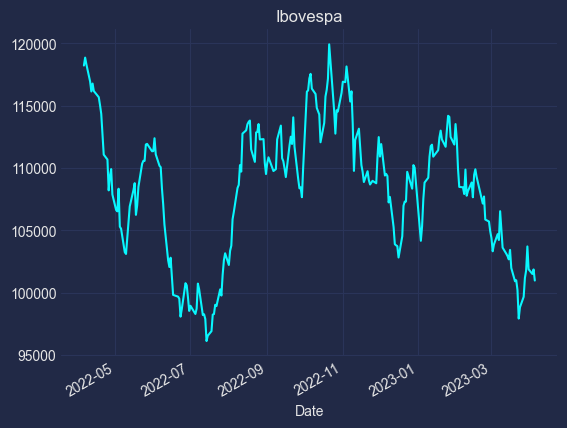

In [10]:
plt.style.use("cyberpunk")

df.plot(y = 'ibovespa', use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

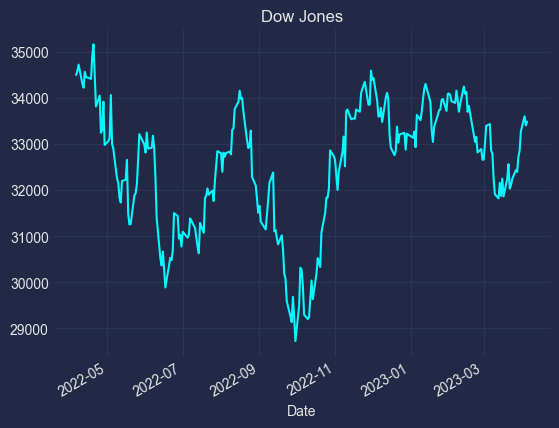

In [11]:
plt.style.use("cyberpunk")

df.plot(y = 'dow jones', use_index = True, legend = False)

plt.title("Dow Jones")

plt.savefig('dowjones.png', dpi = 300)

plt.show()